In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2

In [17]:
raw_data = pd.read_csv('IndexE8.csv')
df_comp = raw_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index('date', inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')

In [18]:
df_comp['market_value'] = df_comp.ftse
del df_comp['spx'],df_comp['dax'],df_comp['ftse'],df_comp['nikkei']
size = int(len(df_comp)*0.8)
train_df = df_comp.iloc[:size]
test_df = df_comp.iloc[size:]

In [19]:
# funtion to test LLR
def LLR_test(mod_1,mod_2,DF=1):
    
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    P = chi2.sf(LR,DF).round(3)
    
    return P

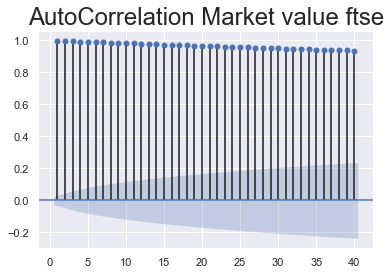

In [20]:
sgt.plot_acf(train_df.market_value, zero=False, lags=40)
plt.title('AutoCorrelation Market value ftse', size=24)
plt.show()

In [21]:
train_df['return_val'] = train_df.market_value.pct_change(1).mul(100)

<ipython-input-21-5373404ed7e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['return_val'] = train_df.market_value.pct_change(1).mul(100)


In [22]:
train_df

,market_value,return_val
date,,
1994-01-07,3445.98,NaN
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166
...,...,...
2013-04-01,6411.74,0.000000
2013-04-02,6490.66,1.230867
2013-04-03,6420.28,-1.084327


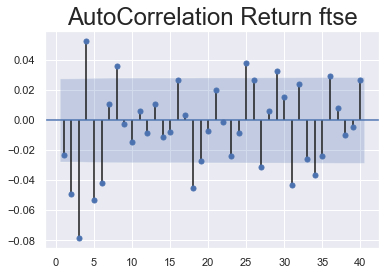

In [24]:
sgt.plot_acf(train_df.return_val[1:], zero=False, lags=40)
plt.title('AutoCorrelation Return ftse', size=24)
plt.show()

### The MA order 1

In [13]:
model_ret_ma_1 = ARMA(train_df.return_val[1:], order=(0,1))
result_ret_ma_1 = model_ret_ma_1.fit()
result_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             return_val   No. Observations:                 5020
Model:                     ARMA(0, 1)   Log Likelihood               -7929.595
Method:                       css-mle   S.D. of innovations              1.174
Date:                Wed, 14 Oct 2020   AIC                          15865.190
Time:                        19:48:13   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0188      0.016      1.162      0.245      -0.013       0.050
ma.L1.return_val    -0.0257      0.015     -1.720      0.085      -0.055       0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           38.8550           +0.0000j           38.8550            0.0000
-----------------------------------------------------------------------------
"""

### Higher Lag MA models

In [27]:
model_ret_ma_2 = ARMA(train_df.return_val[1:], order=(0,2))
result_ret_ma_2 = model_ret_ma_2.fit()
print(result_ret_ma_2.summary())
print(f"LLR Test {LLR_test(model_ret_ma_1,model_ret_ma_2)}")

                              ARMA Model Results                              
Dep. Variable:             return_val   No. Observations:                 5020
Model:                     ARMA(0, 2)   Log Likelihood               -7922.864
Method:                       css-mle   S.D. of innovations              1.173
Date:                Wed, 14 Oct 2020   AIC                          15853.728
Time:                        19:56:01   BIC                          15879.812
Sample:                    01-10-1994   HQIC                         15862.868
                         - 04-05-2013                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0188      0.015      1.239      0.215      -0.011       0.049
ma.L1.return_val    -0.0327      0.014     -2.297      0.022      -0.061      -0.005
ma.L2.return_val    -0.0502 

In [28]:
model_ret_ma_3 = ARMA(train_df.return_val[1:], order=(0,3))
result_ret_ma_3 = model_ret_ma_3.fit()
print(result_ret_ma_3.summary())
print(f"LLR Test {LLR_test(model_ret_ma_2,model_ret_ma_3)}")

                              ARMA Model Results                              
Dep. Variable:             return_val   No. Observations:                 5020
Model:                     ARMA(0, 3)   Log Likelihood               -7904.317
Method:                       css-mle   S.D. of innovations              1.168
Date:                Wed, 14 Oct 2020   AIC                          15818.634
Time:                        19:57:28   BIC                          15851.240
Sample:                    01-10-1994   HQIC                         15830.060
                         - 04-05-2013                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.return_val    -0.0203      0.014     -1.423      0.155      -0.048       0.008
ma.L2.return_val    -0.0556 

In [29]:
model_ret_ma_4 = ARMA(train_df.return_val[1:], order=(0,4))
result_ret_ma_4 = model_ret_ma_4.fit()
print(result_ret_ma_4.summary())
print(f"LLR Test {LLR_test(model_ret_ma_3,model_ret_ma_4)}")

                              ARMA Model Results                              
Dep. Variable:             return_val   No. Observations:                 5020
Model:                     ARMA(0, 4)   Log Likelihood               -7898.773
Method:                       css-mle   S.D. of innovations              1.167
Date:                Wed, 14 Oct 2020   AIC                          15809.547
Time:                        19:59:20   BIC                          15848.674
Sample:                    01-10-1994   HQIC                         15823.257
                         - 04-05-2013                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0189      0.014      1.305      0.192      -0.009       0.047
ma.L1.return_val    -0.0203      0.014     -1.443      0.149      -0.048       0.007
ma.L2.return_val    -0.0551 

In [30]:
model_ret_ma_5 = ARMA(train_df.return_val[1:], order=(0,5))
result_ret_ma_5 = model_ret_ma_5.fit()
print(result_ret_ma_5.summary())
print(f"LLR Test {LLR_test(model_ret_ma_4,model_ret_ma_5)}")

                              ARMA Model Results                              
Dep. Variable:             return_val   No. Observations:                 5020
Model:                     ARMA(0, 5)   Log Likelihood               -7892.823
Method:                       css-mle   S.D. of innovations              1.166
Date:                Wed, 14 Oct 2020   AIC                          15799.645
Time:                        19:59:23   BIC                          15845.294
Sample:                    01-10-1994   HQIC                         15815.641
                         - 04-05-2013                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.return_val    -0.0262      0.014     -1.851      0.064      -0.054       0.002
ma.L2.return_val    -0.0497 

In [31]:
model_ret_ma_6 = ARMA(train_df.return_val[1:], order=(0,6))
result_ret_ma_6 = model_ret_ma_6.fit()
print(result_ret_ma_6.summary())
print(f"LLR Test {LLR_test(model_ret_ma_5,model_ret_ma_6)}")

                              ARMA Model Results                              
Dep. Variable:             return_val   No. Observations:                 5020
Model:                     ARMA(0, 6)   Log Likelihood               -7889.221
Method:                       css-mle   S.D. of innovations              1.165
Date:                Wed, 14 Oct 2020   AIC                          15794.442
Time:                        19:59:27   BIC                          15846.612
Sample:                    01-10-1994   HQIC                         15812.723
                         - 04-05-2013                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0189      0.013      1.430      0.153      -0.007       0.045
ma.L1.return_val    -0.0237      0.014     -1.682      0.093      -0.051       0.004
ma.L2.return_val    -0.0486 

In [32]:
model_ret_ma_7 = ARMA(train_df.return_val[1:], order=(0,7))
result_ret_ma_7 = model_ret_ma_7.fit()
print(result_ret_ma_7.summary())
print(f"LLR Test {LLR_test(model_ret_ma_6,model_ret_ma_7)}")

                              ARMA Model Results                              
Dep. Variable:             return_val   No. Observations:                 5020
Model:                     ARMA(0, 7)   Log Likelihood               -7889.046
Method:                       css-mle   S.D. of innovations              1.165
Date:                Wed, 14 Oct 2020   AIC                          15796.091
Time:                        19:59:32   BIC                          15854.782
Sample:                    01-10-1994   HQIC                         15816.657
                         - 04-05-2013                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0189      0.013      1.418      0.156      -0.007       0.045
ma.L1.return_val    -0.0247      0.014     -1.739      0.082      -0.052       0.003
ma.L2.return_val    -0.0488 

In [33]:
model_ret_ma_8 = ARMA(train_df.return_val[1:], order=(0,8))
result_ret_ma_8 = model_ret_ma_8.fit()
print(result_ret_ma_8.summary())
print(f"LLR Test {LLR_test(model_ret_ma_7,model_ret_ma_8)}")

                              ARMA Model Results                              
Dep. Variable:             return_val   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood               -7885.603
Method:                       css-mle   S.D. of innovations              1.164
Date:                Wed, 14 Oct 2020   AIC                          15791.205
Time:                        20:00:12   BIC                          15856.417
Sample:                    01-10-1994   HQIC                         15814.056
                         - 04-05-2013                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0189      0.014      1.364      0.173      -0.008       0.046
ma.L1.return_val    -0.0238      0.014     -1.688      0.091      -0.051       0.004
ma.L2.return_val    -0.0495 

In [35]:
LLR_test(model_ret_ma_6,model_ret_ma_8,DF=2) 

0.027

#### since value is less than 0.05 the more complicated model is significant

### Residuals of Return 

In [37]:
train_df['res_ret_ma_8'] = result_ret_ma_8.resid[1:]

<ipython-input-37-1dd615693843>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['res_ret_ma_8'] = result_ret_ma_8.resid[1:]


In [40]:
print (f"The mean of the residuals {round(train_df.res_ret_ma_8.mean(), 3)}") 
print (f"The Variance of the residuals {round(train_df.res_ret_ma_8.var(), 3)}")

The mean of the residuals -0.0
The Variance of the residuals 1.356


In [42]:
from math import sqrt

print(f"Standar deviation of the residuals {round(sqrt(train_df.res_ret_ma_8.var()), 3)}")

Standar deviation of the residuals 1.164


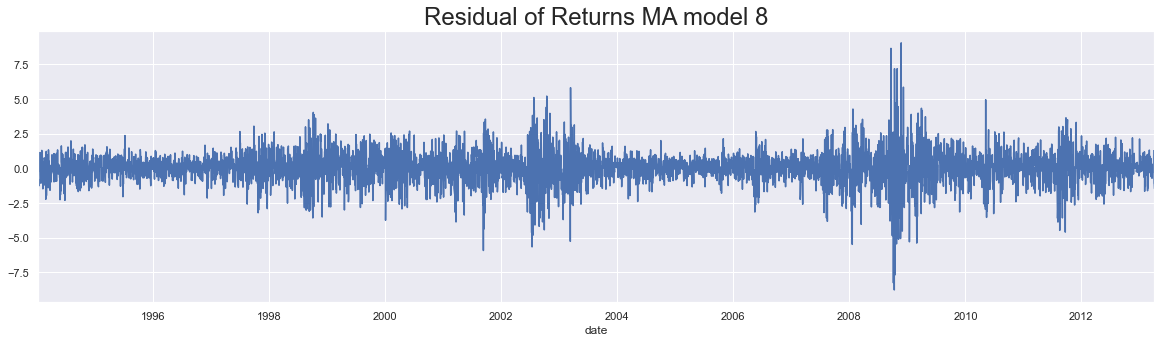

In [44]:
train_df.res_ret_ma_8[1:].plot(figsize=(20,5))
plt.title("Residual of Returns MA model 8", size=24)
plt.show()

In [46]:
sts.adfuller(train_df.res_ret_ma_8[2:])

(-70.83581985465361,
 0.0,
 0,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 15684.05218484252)

Residuals are stationary

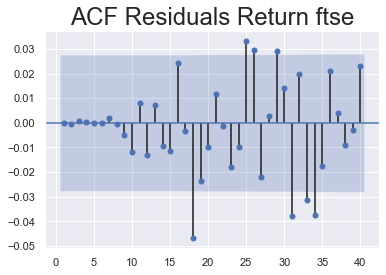

In [48]:
sgt.plot_acf(train_df.res_ret_ma_8[2:], zero=False, lags=40)
plt.title('ACF Residuals Return ftse', size=24)
plt.show()

### MA models on normalized return data

In [49]:
bech_ret = train_df.return_val.iloc[1]
train_df['norm_return'] = train_df.return_val.div(bech_ret).mul(100)

<ipython-input-49-f34744eb0f80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['norm_return'] = train_df.return_val.div(bech_ret).mul(100)


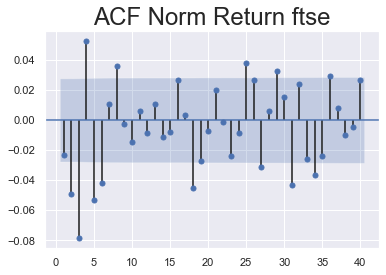

In [50]:
sgt.plot_acf(train_df.norm_return[1:], zero=False, lags=40)
plt.title('ACF Norm Return ftse', size=24)
plt.show()

In [51]:
model_norm_ret_ma_8 = ARMA(train_df.norm_return[1:], order=(0,8))
result_norm_ret_ma_8 = model_norm_ret_ma_8.fit()
print(result_norm_ret_ma_8.summary())
#print(f"LLR Test {LLR_test(model_ret_ma_7,model_ret_ma_8)}")

                              ARMA Model Results                              
Dep. Variable:            norm_return   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood              -40307.597
Method:                       css-mle   S.D. of innovations            742.822
Date:                Wed, 14 Oct 2020   AIC                          80635.194
Time:                        20:22:47   BIC                          80700.406
Sample:                    01-10-1994   HQIC                         80658.045
                         - 04-05-2013                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -11.9731      8.846     -1.354      0.176     -29.310       5.364
ma.L1.norm_return    -0.0238      0.014     -1.688      0.091      -0.051       0.004
ma.L2.norm_return    -0.

In [52]:
train_df['res_norm_ret'] = result_norm_ret_ma_8.resid[1:]

<ipython-input-52-3c8e257c1eba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['res_norm_ret'] = result_norm_ret_ma_8.resid[1:]


In [53]:
print (f"The mean of the norm residuals {round(train_df.res_norm_ret.mean(), 3)}") 
print (f"The Variance of the norm residuals {round(train_df.res_norm_ret.var(), 3)}")

The mean of the norm residuals -0.095
The Variance of the norm residuals 552005.588


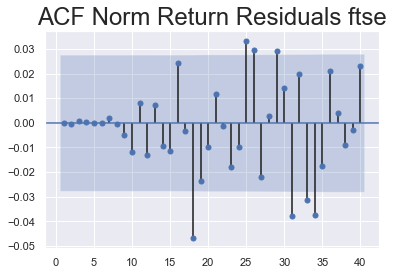

In [55]:
sgt.plot_acf(train_df.res_norm_ret[2:], zero=False, lags=40)
plt.title('ACF Norm Return Residuals ftse', size=24)
plt.show()

In [60]:
model_norm_ret_ma_6 = ARMA(train_df.norm_return[1:], order=(0,6))
result_norm_ret_ma_6 = model_norm_ret_ma_6.fit()
print(result_norm_ret_ma_6.summary())

                              ARMA Model Results                              
Dep. Variable:            norm_return   No. Observations:                 5020
Model:                     ARMA(0, 6)   Log Likelihood              -40311.216
Method:                       css-mle   S.D. of innovations            743.358
Date:                Wed, 14 Oct 2020   AIC                          80638.431
Time:                        20:28:59   BIC                          80690.601
Sample:                    01-10-1994   HQIC                         80656.712
                         - 04-05-2013                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -12.0608      8.442     -1.429      0.153     -28.606       4.485
ma.L1.norm_return    -0.0237      0.014     -1.682      0.093      -0.051       0.004
ma.L2.norm_return    -0.

In [61]:
train_df['res_norm_ret6'] = result_norm_ret_ma_6.resid[1:]

<ipython-input-61-011252a1ac4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['res_norm_ret6'] = result_norm_ret_ma_6.resid[1:]


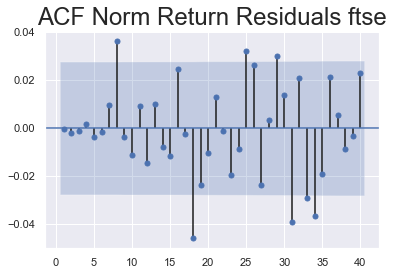

In [62]:
sgt.plot_acf(train_df.res_norm_ret6[2:], zero=False, lags=40)
plt.title('ACF Norm Return Residuals ftse', size=24)
plt.show()

In [63]:
LLR_test(model_norm_ret_ma_6,model_norm_ret_ma_8,DF=2)

0.027

### MA model for Prices

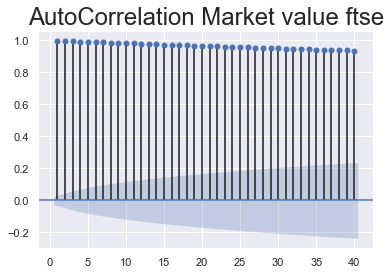

In [64]:
sgt.plot_acf(train_df.market_value, zero=False, lags=40)
plt.title('AutoCorrelation Market value ftse', size=24)
plt.show()

In [65]:
model_ma_1 = ARMA(train_df.market_value, order=(0,1))
result_ma_1 = model_ma_1.fit()
result_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(0, 1)   Log Likelihood              -38629.000
Method:                       css-mle   S.D. of innovations            530.756
Date:                Wed, 14 Oct 2020   AIC                          77264.000
Time:                        20:33:22   BIC                          77283.564
Sample:                    01-07-1994   HQIC                         77270.856
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.5980     14.660    347.187      0.000    5060.866    5118.330
ma.L1.market_value     0.9573      0.003    335.561      0.000       0.952       0.963
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0446           +0.0000j            1.0446            0.5000
-----------------------------------------------------------------------------
"""